<a href="https://colab.research.google.com/github/nicobargioni/machine-learning/blob/main/Nicolas_Bargioni_TP3_AA1_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificaci√≥n

**Nicol√°s Bargioni**

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluaci√≥n de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificaci√≥n a un dataset de su elecci√≥n, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selecci√≥n del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  



## Resoluci√≥n:

El dataset Hepatitis, proveniente del UCI Machine Learning Repository, contiene informaci√≥n cl√≠nica de 155 pacientes con diagn√≥stico de hepatitis.

El objetivo del conjunto de datos es predecir si un paciente vive o muere (Class: LIVE o DIE) a partir de caracter√≠sticas m√©dicas y demogr√°ficas, como la edad, el sexo, la presencia de s√≠ntomas (fatiga, anorexia, ascitis), el uso de esteroides o antivirales, y resultados de laboratorio (niveles de bilirrubina, fosfatasa alcalina, alb√∫mina, etc.).

Las variables incluyen tanto datos categ√≥ricos como continuos, y el dataset presenta algunos valores faltantes, lo cual lo convierte en un caso realista y valioso para aplicar t√©cnicas de clasificaci√≥n supervisada en contextos m√©dicos.

In [33]:
!pip install ucimlrepo

Primero voy a unificar features y target en un solo df para poder hacer el EDA m√°s f√°cilmente

In [34]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

df = pd.concat([hepatitis.data.features, hepatitis.data.targets], axis=1)
df.head()

Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   
1   50    1      1.0           2      1.0      2.0       2.0        1.0   
2   78    1      2.0           2      1.0      2.0       2.0        2.0   
3   31    1      NaN           1      2.0      2.0       2.0        2.0   
4   34    1      2.0           2      2.0      2.0       2.0        2.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0        1.0   
1         2.0              2.0      2.0      2.0      2.0        0.9   
2         2.0              2.0      2.0      2.0      2.0        0.7   
3         2.0              2.0      2.0      2.0      2.0        0.7   
4         2.0              2.0      2.0      2.0      2.0        1.0   

   Alk Phosphate   Sgot  Albumin  Protime  Histology  Class  
0           85.0   18.0      4.0      NaN          1      2  
1          135.0   42.0      3.5      NaN          1      2  
2           96.0   32.0      4.0      NaN          1      2  
3           46.0   52.0      4.0     80.0          1      2  
4            NaN  200.0      4.0      NaN          1      2

A continuaci√≥n se describen las variables:

Class: variable objetivo (target). Indica si el paciente vivi√≥ (LIVE) o muri√≥ (DIE).

Age: edad del paciente (valores enteros entre 10 y 80 a√±os).

Sex: sexo del paciente (male o female).

Steroid: indica si el paciente recibi√≥ tratamiento con esteroides (yes / no).

Antivirals: indica si se administraron antivirales (yes / no).

Fatigue: si el paciente present√≥ fatiga (yes / no).

Malaise: si present√≥ malestar general (yes / no).

Anorexia: si hubo p√©rdida de apetito (yes / no).

Liver Big: agrandamiento del h√≠gado detectado (yes / no).

Liver Firm: firmeza anormal del h√≠gado al examen f√≠sico (yes / no).

Spleen Palpable: si el bazo era palpable (yes / no).

Spiders: presencia de "ara√±as vasculares" en la piel (yes / no).

Ascites: acumulaci√≥n de l√≠quido en el abdomen (yes / no).

Varices: presencia de v√°rices esof√°gicas u otras (yes / no).

Bilirubin: nivel de bilirrubina en sangre (mg/dL).

Alk Phosphate: nivel de fosfatasa alcalina, una enzima hep√°tica (U/L).

SGOT: nivel de la enzima hep√°tica SGOT (AST) (U/L).

Albumin: concentraci√≥n de alb√∫mina en sangre (g/dL).

Protime: tiempo de protrombina, relacionado con la coagulaci√≥n (segundos).

Histology: resultado del estudio histol√≥gico del h√≠gado (yes / no).


## 2. **An√°lisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


##A las distribuciones las voy a ver una vez que haya imputado los valores faltantes. Imputar previamente asegura que la representaci√≥n de las distribuciones, correlaciones, patrones, etc entre variables sea completa y realista, sin sesgos provocados por la ausencia de datos. Esto permite tomar mejores decisiones sobre escalado, detecci√≥n de outliers o selecci√≥n de features para el modelado posterior. Adem√°s seaborn y matplotlib no funcionan bien con NaNs

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [36]:
df.describe()

Age         Sex     Steroid  Antivirals     Fatigue     Malaise  \
count  155.000000  155.000000  154.000000  155.000000  154.000000  154.000000   
mean    41.200000    1.103226    1.506494    1.845161    1.350649    1.603896   
std     12.565878    0.305240    0.501589    0.362923    0.478730    0.490682   
min      7.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     32.000000    1.000000    1.000000    2.000000    1.000000    1.000000   
50%     39.000000    1.000000    2.000000    2.000000    1.000000    2.000000   
75%     50.000000    1.000000    2.000000    2.000000    2.000000    2.000000   
max     78.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         Anorexia   Liver Big  Liver Firm  Spleen Palpable     Spiders  \
count  154.000000  145.000000  144.000000        150.00000  150.000000   
mean     1.792208    1.827586    1.583333          1.80000    1.660000   
std      0.407051    0.379049    0.494727          0.40134    0.475296   
min      1.000000    1.000000    1.000000          1.00000    1.000000   
25%      2.000000    2.000000    1.000000          2.00000    1.000000   
50%      2.000000    2.000000    2.000000          2.00000    2.000000   
75%      2.000000    2.000000    2.000000          2.00000    2.000000   
max      2.000000    2.000000    2.000000          2.00000    2.000000   

          Ascites    Varices   Bilirubin  Alk Phosphate       Sgot  \
count  150.000000  150.00000  149.000000     126.000000  151.00000   
mean     1.866667    1.88000    1.427517     105.325397   85.89404   
std      0.341073    0.32605    1.212149      51.508109   89.65089   
min      1.000000    1.00000    0.300000      26.000000   14.00000   
25%      2.000000    2.00000    0.700000      74.250000   31.50000   
50%      2.000000    2.00000    1.000000      85.000000   58.00000   
75%      2.000000    2.00000    1.500000     132.250000  100.50000   
max      2.000000    2.00000    8.000000     295.000000  648.00000   

          Albumin     Protime   Histology       Class  
count  139.000000   88.000000  155.000000  155.000000  
mean     3.817266   61.852273    1.451613    1.793548  
std      0.651523   22.875244    0.499266    0.406070  
min      2.100000    0.000000    1.000000    1.000000  
25%      3.400000   46.000000    1.000000    2.000000  
50%      4.000000   61.000000    1.000000    2.000000  
75%      4.200000   76.250000    2.000000    2.000000  
max      6.400000  100.000000    2.000000    2.000000

##Imputaci√≥n de valores faltantes

In [37]:
df.isnull().sum().sort_values(ascending = False)

Protime            67
Alk Phosphate      29
Albumin            16
Liver Firm         11
Liver Big          10
Bilirubin           6
Spleen Palpable     5
Spiders             5
Varices             5
Ascites             5
Sgot                4
Steroid             1
Malaise             1
Fatigue             1
Anorexia            1
Age                 0
Antivirals          0
Sex                 0
Histology           0
Class               0
dtype: int64

Como tengo variables categ√≥ricas y num√©ricas continuas con NaNs, tengo que separarlas para imputar con la moda en una, y con la mediana en la otra. Con la mediana, porque al ser un dataset de medicina, puede haber outliers naturales que tengo que respetar (por ejemplo, bilirrubina muy alta)

In [38]:
# Columnas categ√≥ricas (binarias tipo s√≠/no)
cat_cols = ['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
            'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']

# Columnas num√©ricas continuas
num_cols = ['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

In [39]:
from sklearn.impute import SimpleImputer

# Imputador para variables categ√≥ricas (moda)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Imputador para variables num√©ricas (mediana)
imputer_num = SimpleImputer(strategy='median')

In [40]:
# Aplicar imputaci√≥n a las columnas categ√≥ricas
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Aplicar imputaci√≥n a las columnas num√©ricas
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [41]:
df.isnull().sum().sort_values(ascending = False)

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64

In [42]:
df.describe()

Age         Sex     Steroid  Antivirals     Fatigue     Malaise  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean    41.200000    1.103226    1.509677    1.845161    1.348387    1.606452   
std     12.565878    0.305240    0.501527    0.362923    0.478004    0.490120   
min      7.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     32.000000    1.000000    1.000000    2.000000    1.000000    1.000000   
50%     39.000000    1.000000    2.000000    2.000000    1.000000    2.000000   
75%     50.000000    1.000000    2.000000    2.000000    2.000000    2.000000   
max     78.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         Anorexia   Liver Big  Liver Firm  Spleen Palpable     Spiders  \
count  155.000000  155.000000  155.000000       155.000000  155.000000   
mean     1.793548    1.838710    1.612903         1.806452    1.670968   
std      0.406070    0.368991    0.488665         0.396360    0.471385   
min      1.000000    1.000000    1.000000         1.000000    1.000000   
25%      2.000000    2.000000    1.000000         2.000000    1.000000   
50%      2.000000    2.000000    2.000000         2.000000    2.000000   
75%      2.000000    2.000000    2.000000         2.000000    2.000000   
max      2.000000    2.000000    2.000000         2.000000    2.000000   

          Ascites     Varices   Bilirubin  Alk Phosphate        Sgot  \
count  155.000000  155.000000  155.000000     155.000000  155.000000   
mean     1.870968    1.883871    1.410968     101.522581   85.174194   
std      0.336322    0.321418    1.191178      47.082042   88.590122   
min      1.000000    1.000000    0.300000      26.000000   14.000000   
25%      2.000000    2.000000    0.800000      78.000000   32.500000   
50%      2.000000    2.000000    1.000000      85.000000   58.000000   
75%      2.000000    2.000000    1.500000     119.500000   99.000000   
max      2.000000    2.000000    8.000000     295.000000  648.000000   

          Albumin     Protime   Histology       Class  
count  155.000000  155.000000  155.000000  155.000000  
mean     3.836129   61.483871    1.451613    1.793548  
std      0.619267   17.198745    0.499266    0.406070  
min      2.100000    0.000000    1.000000    1.000000  
25%      3.500000   57.000000    1.000000    2.000000  
50%      4.000000   61.000000    1.000000    2.000000  
75%      4.200000   65.000000    2.000000    2.000000  
max      6.400000  100.000000    2.000000    2.000000

##Visualizaci√≥n

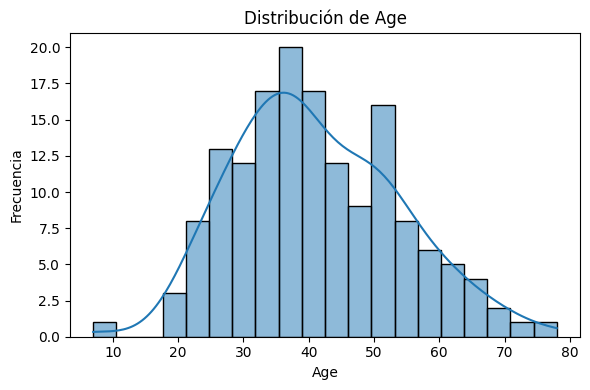

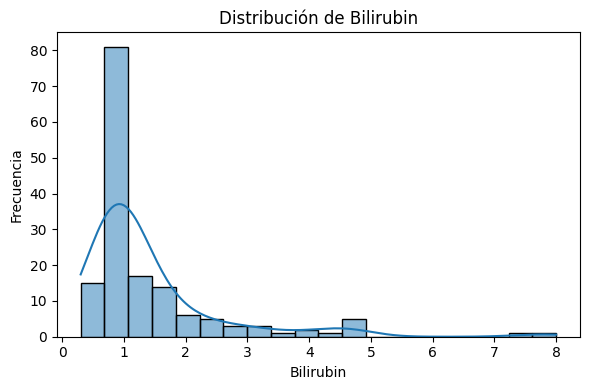

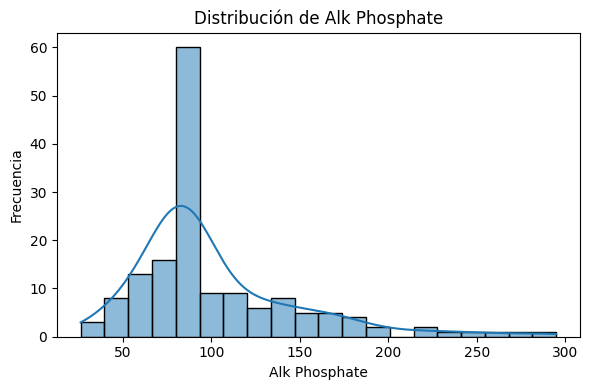

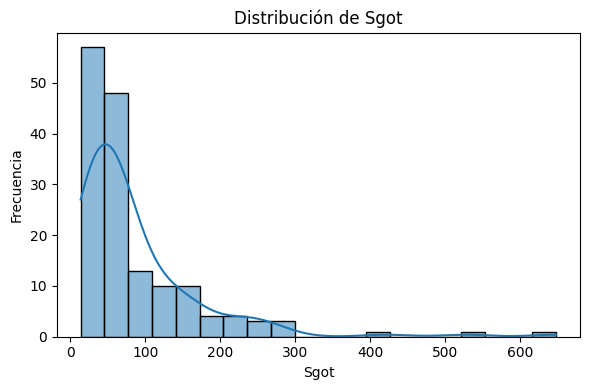

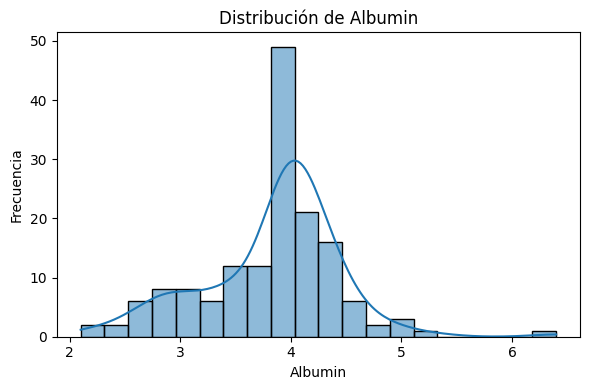

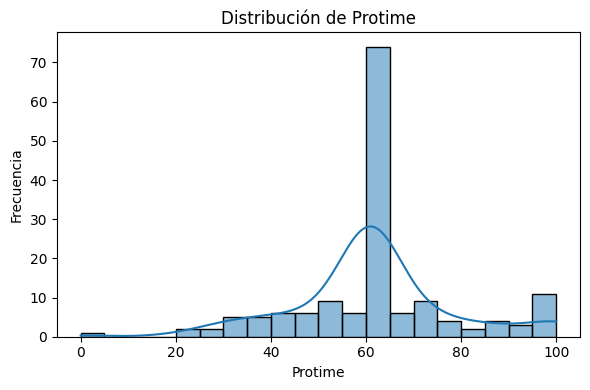

In [43]:
#@title Distribuci√≥n de variables num√©ricas

import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas num√©ricas reales
num_cols = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

La variable Age presenta una distribuci√≥n aproximadamente normal, centrada entre los 30 y 50 a√±os, lo que indica una buena representaci√≥n de adultos en distintos rangos etarios.

En cambio, variables como Bilirubin, Alk Phosphate y Sgot presentan distribuciones fuertemente sesgadas hacia la izquierda, lo cual sugiere la presencia de outliers que podr√≠an influir en ciertos modelos sensibles a escala.

Albumin, por su parte, muestra una distribuci√≥n m√°s sim√©trica y concentrada alrededor de los 4 g/dL. Estas visualizaciones me permiten evaluar la necesidad de escalar o transformar los datos antes del modelado.

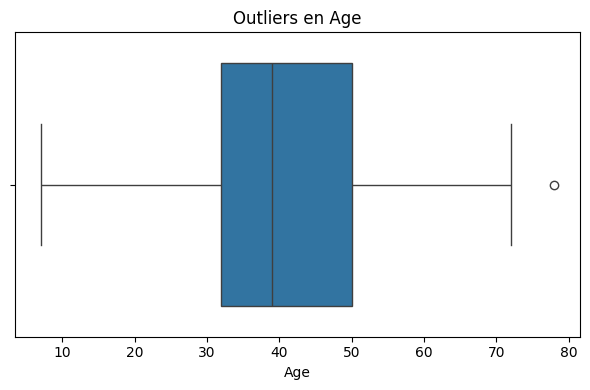

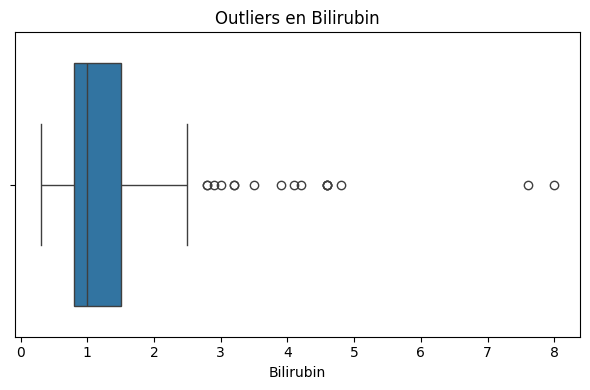

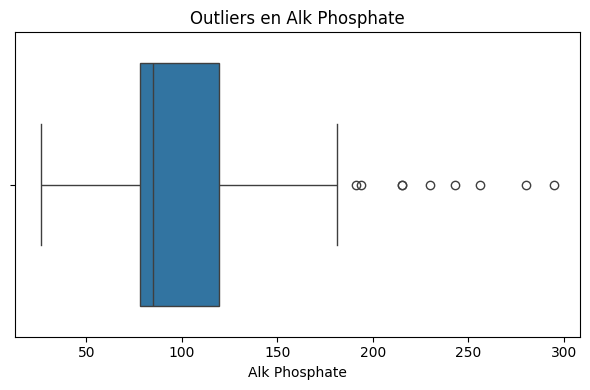

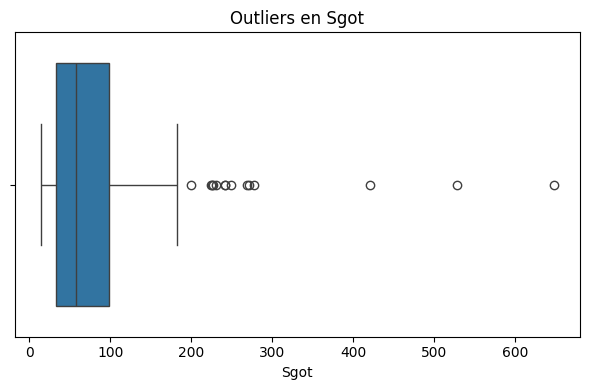

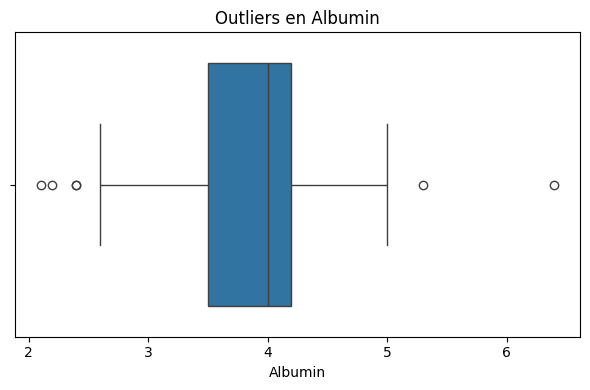

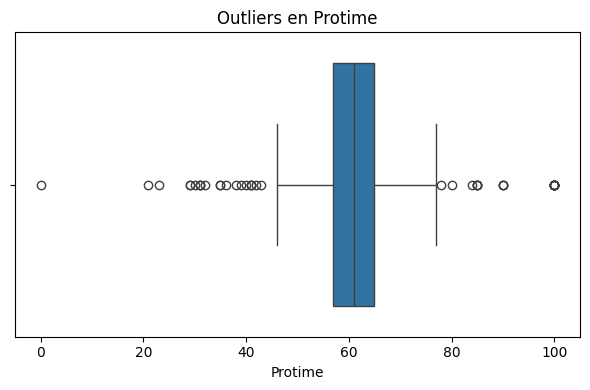

In [44]:
#@title Detecci√≥n de outliers

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.tight_layout()
    plt.show()

Respecto a los outliers, voy a hacer lo siguiente, considerando el punto de vista cl√≠nico:

1. Bilirubin: outliers son esperables y cl√≠nicamente v√°lidos. Los dejo

2. Alk Phosphate (Fosfatasa alcalina): enzima hep√°tica, puede aumentar por enfermedad hep√°tica u √≥sea. Valores elevados no siempre son errores, pueden deberse a m√∫ltiples causas. Valores extremadamente altos y muy pocos pacientes con esos valores, podr√≠an distorsionar. Voy a **winsorizar**

3. SGOT (AST): enzima hep√°tica. Niveles altos pueden significar da√±o hep√°tico grave. Hay distribuci√≥n asim√©trica, cl√≠nicamente esperable. Voy a winsorizar porque el nivel no es descabellado.

4. Albumin: prote√≠na producida por el h√≠gado. Bajos niveles = mal pron√≥stico. Voy a mantenerlos porque niveles extremos no suelen ser errores.

A protime la voy a analizar por separado, porque ten√≠a muchos nulos antes de imputar con la mediana, entonces, dado que cl√≠nicamente es una variable que s√© que tiene cierta influencia, y que en los registros faltantes tom√≥ el valor de una constante "ficticia", puede que haya perdido el poder predictivo que deber√≠a tener

In [45]:
#@title Comparaci√≥n de distribuci√≥n: Protime original vs imputada

hepatitis = fetch_ucirepo(id=46)

df_nuevo = pd.concat([hepatitis.data.features, hepatitis.data.targets], axis=1)

In [46]:
df_nuevo

Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0     30    2      1.0           2      2.0      2.0       2.0        1.0   
1     50    1      1.0           2      1.0      2.0       2.0        1.0   
2     78    1      2.0           2      1.0      2.0       2.0        2.0   
3     31    1      NaN           1      2.0      2.0       2.0        2.0   
4     34    1      2.0           2      2.0      2.0       2.0        2.0   
..   ...  ...      ...         ...      ...      ...       ...        ...   
150   46    1      2.0           2      1.0      1.0       1.0        2.0   
151   44    1      2.0           2      1.0      2.0       2.0        2.0   
152   61    1      1.0           2      1.0      1.0       2.0        1.0   
153   53    2      1.0           2      1.0      2.0       2.0        2.0   
154   43    1      2.0           2      1.0      2.0       2.0        2.0   

     Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0           2.0              2.0      2.0      2.0      2.0        1.0   
1           2.0              2.0      2.0      2.0      2.0        0.9   
2           2.0              2.0      2.0      2.0      2.0        0.7   
3           2.0              2.0      2.0      2.0      2.0        0.7   
4           2.0              2.0      2.0      2.0      2.0        1.0   
..          ...              ...      ...      ...      ...        ...   
150         2.0              2.0      1.0      1.0      1.0        7.6   
151         1.0              2.0      2.0      2.0      2.0        0.9   
152         1.0              2.0      1.0      2.0      2.0        0.8   
153         2.0              1.0      1.0      2.0      1.0        1.5   
154         2.0              1.0      1.0      1.0      2.0        1.2   

     Alk Phosphate   Sgot  Albumin  Protime  Histology  Class  
0             85.0   18.0      4.0      NaN          1      2  
1            135.0   42.0      3.5      NaN          1      2  
2             96.0   32.0      4.0      NaN          1      2  
3             46.0   52.0      4.0     80.0          1      2  
4              NaN  200.0      4.0      NaN          1      2  
..             ...    ...      ...      ...        ...    ...  
150            NaN  242.0      3.3     50.0          2      1  
151          126.0  142.0      4.3      NaN          2      2  
152           75.0   20.0      4.1      NaN          2      2  
153           81.0   19.0      4.1     48.0          2      2  
154          100.0   19.0      3.1     42.0          2      1  

[155 rows x 20 columns]

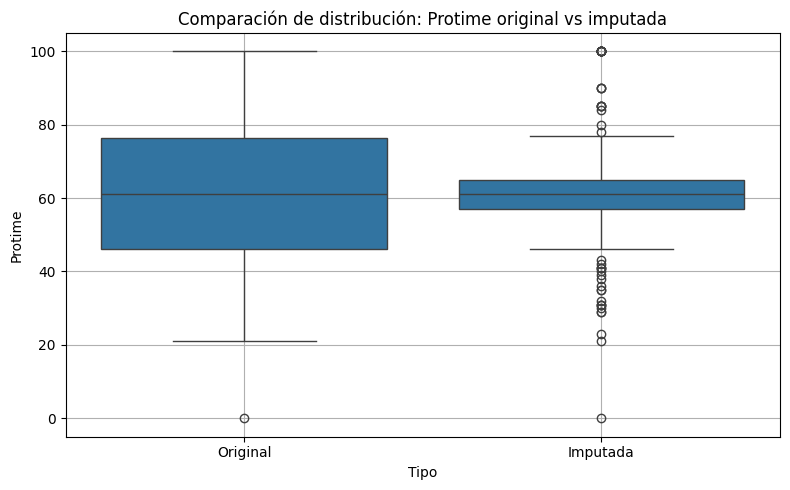

In [47]:
# Copio la columna original con valores faltantes
protime_original = df_nuevo['Protime'].copy()

# Imputo los nan con la mediana
protime_median = df_nuevo['Protime'].fillna(df_nuevo['Protime'].median())

# Creo un nuevo DataFrame para comparar
# Concatenar primero y luego resetear el index
df_plot = pd.concat([
    pd.DataFrame({'Protime': protime_original, 'Tipo': 'Original'}),
    pd.DataFrame({'Protime': protime_median, 'Tipo': 'Imputada'})
]).reset_index(drop=True) # Reset index AFTER concatenation

# Grafico boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, x='Tipo', y='Protime')
plt.title("Comparaci√≥n de distribuci√≥n: Protime original vs imputada")
plt.grid(True)
plt.tight_layout()
plt.show()

Al imputar con la mediana, se concentran los valores faltantes en un √∫nico valor (el del 50%). Por lo tanto, la imputaci√≥n con la mediana no distorsion√≥ la forma de la variable, ni gener√≥ valores extremos que antes no exist√≠an.

Eso es bueno: indica que la imputaci√≥n fue conservadora y respetuosa del comportamiento original de la variable (aunque disminuye la varianza). En la vida real, deber√≠a consultar con un profesional para ver si no convendr√≠a directamente eliminarla, pero para este caso la voy a dejar, quit√°ndole virtualmente cierto peso a su influencia en la clase a predecir.

Conclusi√≥n: dejo los outliers tal como est√°n



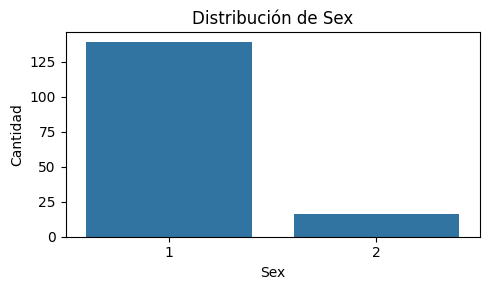

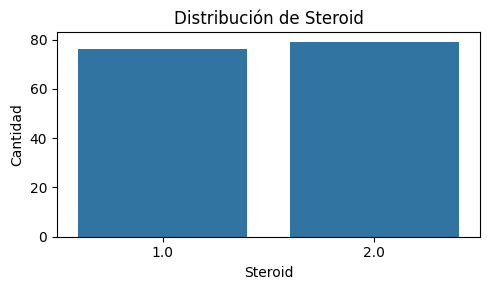

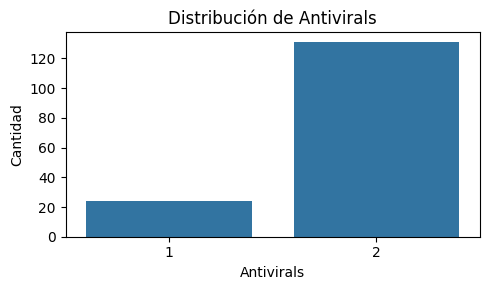

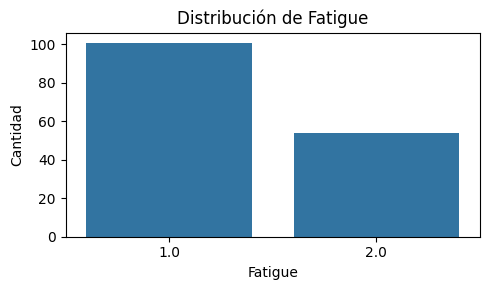

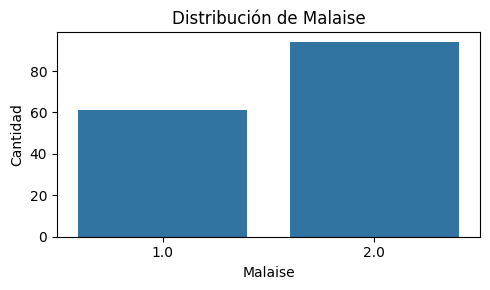

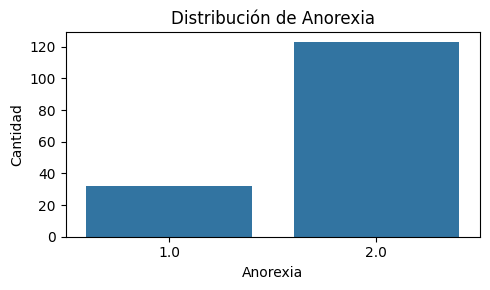

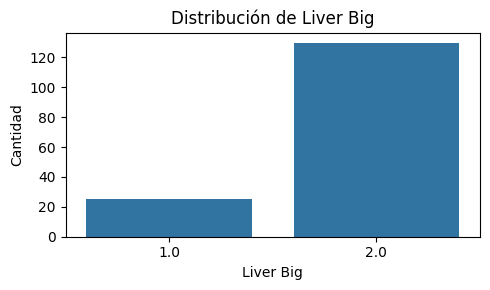

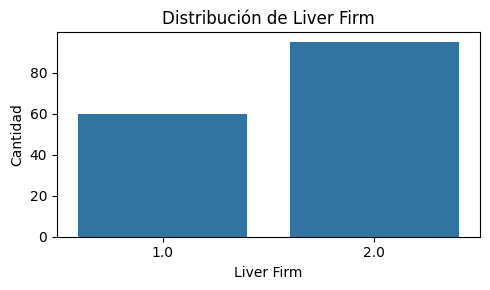

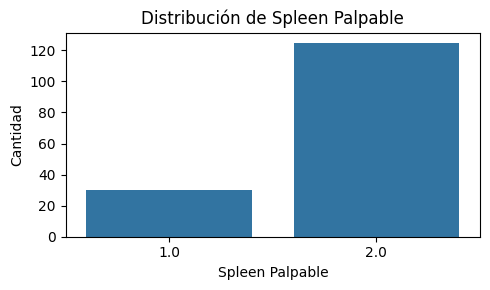

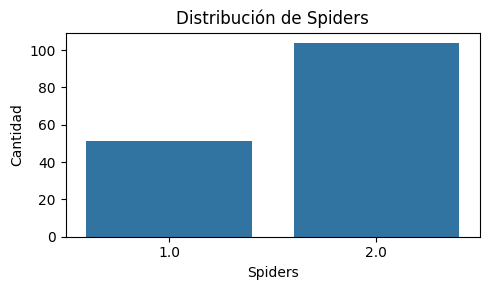

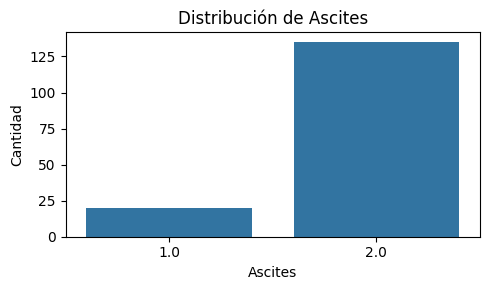

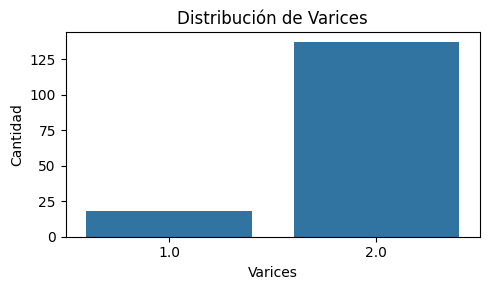

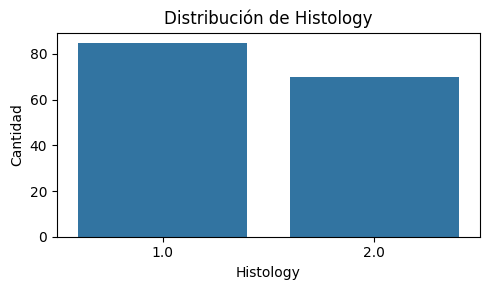

In [48]:
#@title Distribuci√≥n de variables categ√≥ricas (binarias)

cat_cols = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
            'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
            'Ascites', 'Varices', 'Histology']

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.show()

Ac√° estoy visualizando la distribuci√≥n de estas variables con countplots para verificar si hay clases desbalanceadas que puedan afectar el rendimiento de los modelos.

Se observa, por ejemplo, que la variable Sex presenta una fuerte desproporci√≥n entre hombres y mujeres, mientras que variables como Steroid y Histology est√°n m√°s equilibradas.

Esta informaci√≥n es √∫til para tener en cuenta en el an√°lisis posterior y evaluar si ser√° necesario aplicar t√©cnicas de balanceo, como sobremuestreo (SMOTE) o submuestreo, al entrenar los modelos de clasificaci√≥n.

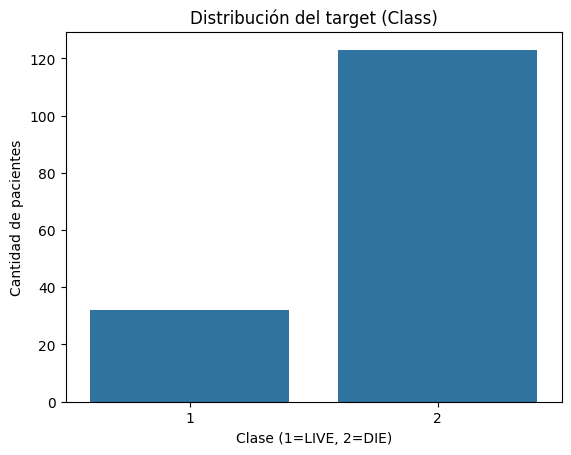

In [49]:
#@title Distribuci√≥n del target

sns.countplot(x='Class', data=df)

plt.title("Distribuci√≥n del target (Class)")
plt.xlabel("Clase (1=LIVE, 2=DIE)")
plt.ylabel("Cantidad de pacientes")
plt.show()

La variable objetivo est√° codificada como 1 = LIVE y 2 = DIE. Al analizar su distribuci√≥n, se observa un fuerte desbalance entre las clases: hay significativamente m√°s pacientes en la clase 2 (DIE) que en la clase 1 (LIVE).

Este desequilibrio afecta a los algoritmos de clasificaci√≥n, ya que tienden a favorecer la clase mayoritaria y a subestimar la importancia de la minoritaria. Por esta raz√≥n, ser√° necesario considerar t√©cnicas para manejar el desbalance, como el sobremuestreo de la clase minoritaria (por ejemplo, mediante SMOTE).

In [50]:
#@title Tratamiento de outliers

from scipy.stats.mstats import winsorize

# Copia del DataFrame original para no modificarlo directamente
df_winsor = df.copy()

# Winsorizamos Alk Phosphate y SGOT (AST) al 5% por cada extremo (puede ajustarse)
df_winsor['Alk Phosphate'] = winsorize(df_winsor['Alk Phosphate'], limits=[0.05, 0.05])
df_winsor['Sgot'] = winsorize(df_winsor['Sgot'], limits=[0.05, 0.05])

In [51]:
df_winsor.head(1)

Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0        1.0   

   Alk Phosphate  Sgot  Albumin  Protime  Histology  Class  
0           85.0  18.0      4.0     61.0        1.0      2

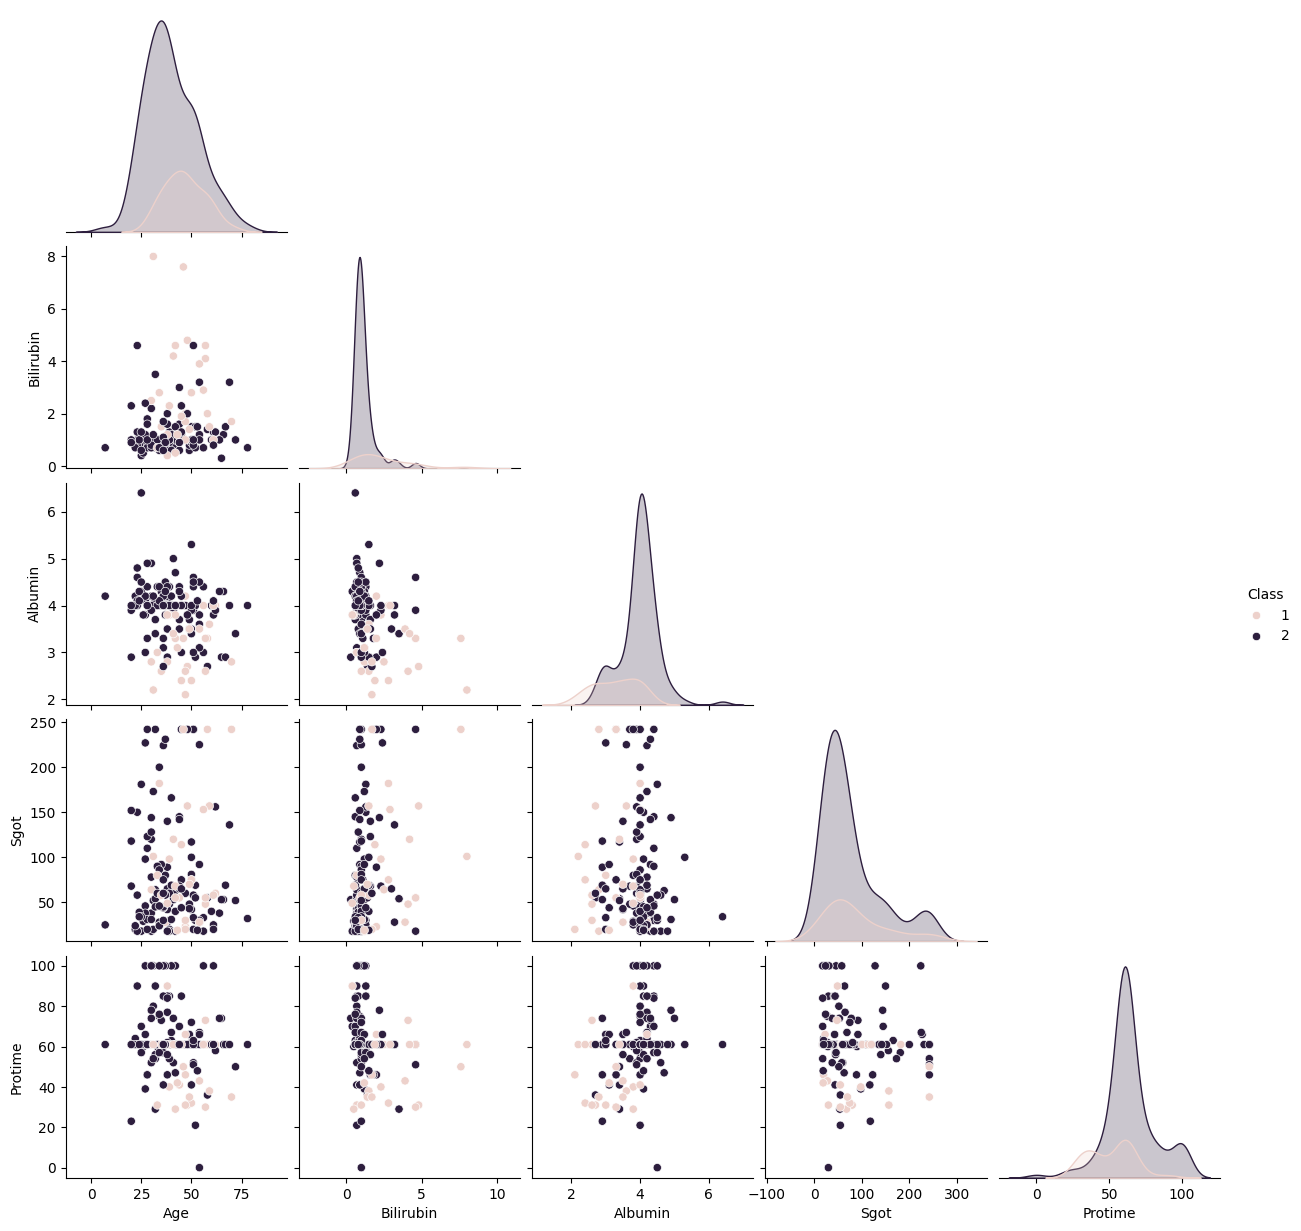

In [52]:
subset = ['Age', 'Bilirubin', 'Albumin', 'Sgot', 'Protime']

sns.pairplot(df_winsor[subset + ['Class']], hue='Class', corner=True)

Luego de imputar los valores faltantes, arm√© una visualizaci√≥n exploratoria para entender mejor la distribuci√≥n y comportamiento de las variables del dataset.

Para las variables NUM√âRICAS (como Age, Bilirubin, Sgot, Albumin, Protime, entre otras) arm√© histogramas con curvas de densidad (kde) para observar su distribuci√≥n, simetr√≠a y posibles concentraciones o asimetr√≠as. Adem√°s, complement√© con boxplots para detectar posibles valores at√≠picos (outliers), los cuales pueden influir negativamente en algunos modelos de clasificaci√≥n. Este an√°lisis permiti√≥ identificar rangos comunes, variabilidad y detectar casos extremos que podr√≠an requerir tratamiento posterior.

Por otro lado, para las variables CATEG√ìRICAS BINARIAS (como Sex, Steroid, Fatigue, Histology, etc.), arm√© gr√°ficos de barras (countplots) que muestran la cantidad de ocurrencias de cada categor√≠a. Esto, para detectar posibles desbalances en los datos, tanto en variables predictoras como en la variable objetivo.

Finalmente, arm√© un pairplot para explorar la relaci√≥n entre variables num√©ricas y ver si existe alguna separabilidad visual entre las clases, lo cual puede ser √∫til al momento de seleccionar un modelo de clasificaci√≥n adecuado.

**Conclusiones del pairplot**:

1. Bilirubin y Sgot tienden a estar m√°s elevadas en pacientes que murieron (Class = 2), lo que tiene sentido cl√≠nico ya que son marcadores de da√±o hep√°tico.

2. Albumin muestra una concentraci√≥n m√°s baja en la clase 2, lo cual tambi√©n es consistente con pron√≥stico desfavorable (la hipoalbuminemia indica deterioro hep√°tico).

3. Protime no presenta una diferenciaci√≥n clara entre clases, aunque hay cierta dispersi√≥n mayor en la clase 2.

4. Age no parece tener una separaci√≥n clara entre clases, aunque vale la pena evaluarla en combinaci√≥n con otras variables.

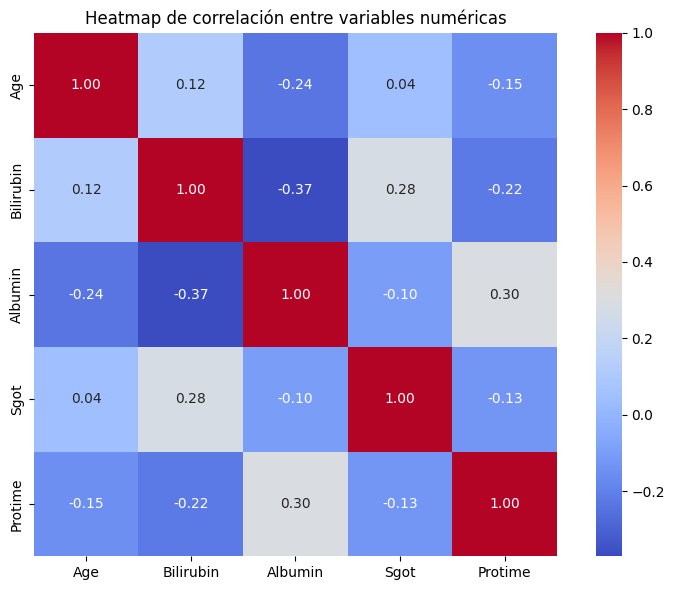

In [53]:
# Filtrar solo las variables num√©ricas que fueron usadas en el pairplot
numerical_vars = ['Age', 'Bilirubin', 'Albumin', 'Sgot', 'Protime']
correlation_matrix = df_winsor[numerical_vars].corr()

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap de correlaci√≥n entre variables num√©ricas")
plt.tight_layout()
plt.show()

No hay variables redundantes claras, as√≠ que no parece necesario eliminar ninguna num√©rica por multicolinealidad.

Las variables aportan informaci√≥n complementaria, lo que es ideal para los modelos que voy a implementar.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras caracter√≠sticas que crea conveniente.

Realice la divisi√≥n de datos (entrenamiento / testeo / CV seg√∫n corresponda)

## Resoluci√≥n:

**Limpieza**

1. Manejo de valores faltantes
Se identificaron valores faltantes en:

Bilirubin, Albumin, Alk Phosphate, SGOT, Protime

Acci√≥n tomada:
Se imputaron los valores faltantes utilizando la mediana, ya que:

Las variables son num√©ricas continuas

La mediana es robusta ante outliers (que estaban presentes)

No se quer√≠a perder informaci√≥n (pocas filas en total: 155)

La imputaci√≥n conserv√≥ la forma general de la distribuci√≥n.

========================================

2. Manejo de outliers
Se identificaron valores extremos principalmente en:

Alk Phosphate, Sgot y Protime

Acci√≥n tomada:
Se aplic√≥ winsorizaci√≥n al 5% y 95% en Sgot y Protime para evitar que los extremos distorsionen los modelos.

Esto redujo la varianza sin perder la forma de la distribuci√≥n.

========================================

3. Variables descartadas:

**Alk Phosphate y Protime**

Motivos:

- Alto n√∫mero de outliers

- Distribuci√≥n fuertemente asim√©trica

- Baja correlaci√≥n con la clase (Class)

- Redundante con otras variables hep√°ticas m√°s representativas (como SGOT, Bilirubin)

========================================

4. Variables categ√≥ricas binarias

Estas variables est√°n codificadas como 1 o 2 (no como texto). Son:

**Sex, Ascites, Varices, Spiders, Edema, Histology**

Estas variables est√°n codificadas num√©ricamente como 1 y 2.

Para la Regresi√≥n Log√≠stica, voy a aplicar One-Hot Encoding para convertirlas en variables binarias.

========================================

Escalado:

Dado que voy a hacer regresi√≥n log√≠stica, voy a escalar las variables num√©ricas. Se detect√≥ un fuerte desbalance entre las clases del target (LIVE vs. DIE). Se considerar√° el uso de ponderaci√≥n de clases (class_weight='balanced') en la regresi√≥n log√≠stica para evitar que el modelo favorezca sistem√°ticamente la clase mayoritaria.




## 4. **Clasificaci√≥n con logistic regression**  
   

En este apartado entrenar√° un clasificador con la librer√≠a sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluaci√≥n

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# 1. Preparamos los datos
df_sin_protime = df_winsor.drop(columns=["Protime", "Alk Phosphate"])

X = df_sin_protime.drop("Class", axis=1)
y = df_sin_protime["Class"]

y = y.replace({2: 0})  # Ahora: 0 = Muere, 1 = Vive

cat_cols = [
    "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia",
    "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders",
    "Ascites", "Varices", "Histology"
]

num_cols = [col for col in X.columns if col not in cat_cols]

# Ac√° estoy separando entre variables categ√≥ricas binarias y num√©ricas
# para hacer one hot encoding en las primeras y escalar las segundas

# 2. Validaci√≥n cruzada manual con SMOTE dentro de cada fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # One-hot encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Combinar
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE ---> esto es porque las clases del dataset est√°n desbalanceadas
    # SMOTE crea instancias sint√©ticas de la clase minoritaria (muere) solo sobre
    # el set de entrenamiento, para balancearlo

    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_bal, y_train_bal)

    # Evaluar
    y_pred = model.predict(X_test_final)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

# Mostrar resultados promedio
print("Resultados promedio tras validaci√≥n cruzada (5-fold):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

Resultados promedio tras validaci√≥n cruzada (5-fold):
Accuracy promedio:  0.80
Precision promedio: 0.73
Recall promedio:    0.75
F1-score promedio:  0.73


In [55]:
print("Clases despu√©s del reemplazo:", np.unique(y))  # Deber√≠a dar [0 1]

Clases despu√©s del reemplazo: [0 1]


In [56]:
X.head(1)

Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  Sgot  \
0         2.0              2.0      2.0      2.0      2.0        1.0  18.0   

   Albumin  Histology  
0      4.0        1.0

##Evaluaci√≥n final fuera de CV

Ya hice validaci√≥n cruzada con SMOTE y el resultado fue positivo.
Ahora quiero entrenar el modelo final con 80% de datos en train y 20% en test

In [57]:
from sklearn.model_selection import train_test_split

# 1. Divido en entrenamiento y testeo externo (20% testeo)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Preprocesamiento
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train_ext[cat_cols])
X_test_cat = encoder.transform(X_test_ext[cat_cols])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_ext[num_cols])
X_test_num = scaler.transform(X_test_ext[num_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

# 3. Balanceo SOLO EL ENTRENAMIENTO
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train_ext)

# 4. Entreno modelo final
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000)

### 4.2 M√©tricas de evaluaci√≥n

Muestre el desempe√±o en el conjunto de datos de entrenamiento y testeo.
Mencione las m√©tricas utilizadas. No se olvide de mostrar la matriz de confusi√≥n.
Explique los resultados obtenidos.

In [58]:
# 5. Predicciones y evaluaci√≥n
from sklearn.metrics import classification_report, confusion_matrix

print("\nüîπ Evaluaci√≥n en Entrenamiento (con SMOTE):")
y_pred_train = model.predict(X_train_bal)
print(confusion_matrix(y_train_bal, y_pred_train))
print(classification_report(y_train_bal, y_pred_train, target_names=["Muere", "Vive"]))

print("\nüîπ Evaluaci√≥n en Testeo Real:")
y_pred_test = model.predict(X_test_final)
print(confusion_matrix(y_test_ext, y_pred_test))
print(classification_report(y_test_ext, y_pred_test, target_names=["Muere", "Vive"]))


üîπ Evaluaci√≥n en Entrenamiento (con SMOTE):
[[86 12]
 [11 87]]
              precision    recall  f1-score   support

       Muere       0.89      0.88      0.88        98
        Vive       0.88      0.89      0.88        98

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196


üîπ Evaluaci√≥n en Testeo Real:
[[20  5]
 [ 1  5]]
              precision    recall  f1-score   support

       Muere       0.95      0.80      0.87        25
        Vive       0.50      0.83      0.62         6

    accuracy                           0.81        31
   macro avg       0.73      0.82      0.75        31
weighted avg       0.86      0.81      0.82        31



La evaluaci√≥n del modelo entrenado con datos balanceados mediante SMOTE muestra un desempe√±o s√≥lido en el conjunto de entrenamiento, con m√©tricas equilibradas entre clases (precisi√≥n, recall y F1-score en torno a 0.88), lo que indica que el modelo aprendi√≥ de forma sim√©trica a clasificar casos de "Muere" y "Vive".

Al evaluar sobre el conjunto de testeo real (sin balancear), el modelo mantiene un buen desempe√±o general (accuracy = 0.81), destac√°ndose especialmente en la clase cr√≠tica ‚ÄúMuere‚Äù, con un recall de 0.80 (detecta correctamente 8 de cada 10 muertes reales) y una precisi√≥n de 0.95 (pocos falsos positivos).

En contrapartida, la clase ‚ÄúVive‚Äù presenta menor precisi√≥n (0.50), aunque su recall es alto (0.83), lo que sugiere que el modelo tiende a etiquetar casos como ‚ÄúMuere‚Äù por precauci√≥n. Este comportamiento es cl√≠nicamente deseable, ya que prioriza la detecci√≥n de muertes (reduciendo falsos negativos) incluso a costa de etiquetar algunos pacientes vivos como casos de riesgo.

En conjunto, los resultados validan que el modelo generaliza bien fuera del entorno balanceado y que su configuraci√≥n actual es adecuada para entornos cl√≠nicos donde el costo de no detectar un fallecimiento potencial es alto.

In [59]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_proba = model.predict_proba(X_test_final)[:, 0]  # Ac√° obtengo la probabilidad de que cada muestra del test sea "Muere"

thresholds = np.linspace(0.1, 0.9, 100) # Ac√° armo 100 posbiles umbrales entre 0.1 y 0.9
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=0)
    f1_scores.append(f1)

# Encontrar umbral con mejor F1-score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"üîç Mejor umbral para clase 'Muere': {best_threshold:.2f}")
print(f"‚≠êÔ∏è F1-score en ese umbral: {best_f1:.2f}")

# Aplicar el mejor umbral
y_pred_best = (y_proba >= best_threshold).astype(int)

# Mostrar resultados
print("\nüìä Matriz de confusi√≥n con umbral √≥ptimo:")
print(confusion_matrix(y_test, y_pred_best))

print("\nüìÑ Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_best, target_names=["Muere", "Vive"]))

üîç Mejor umbral para clase 'Muere': 0.88
‚≠êÔ∏è F1-score en ese umbral: 0.83

üìä Matriz de confusi√≥n con umbral √≥ptimo:
[[20  4]
 [ 4  3]]

üìÑ Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

       Muere       0.83      0.83      0.83        24
        Vive       0.43      0.43      0.43         7

    accuracy                           0.74        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.74      0.74      0.74        31



##¬øPor qu√© cambi√© el umbral de decisi√≥n?

Para mejorar la detecci√≥n de la clase cr√≠tica ‚ÄúMuere‚Äù, se ajust√≥ el umbral de decisi√≥n del modelo. Por defecto, LogisticRegression usa un umbral de 0.5, pero en escenarios con clases desbalanceadas y alto costo de los falsos negativos (como en medicina), puede ser √∫til ajustar este umbral.

Se evaluaron 100 posibles valores entre 0.1 y 0.9, calculando el F1-score para la clase ‚ÄúMuere‚Äù (codificada como 0). El mejor rendimiento se obtuvo con un umbral de 0.88, logrando un F1-score de 0.83 para esa clase.

Con este umbral, el modelo clasific√≥ correctamente 20 de 24 muertes reales (recall = 0.83) y tuvo 4 falsos positivos (precisi√≥n = 0.83). La clase ‚ÄúVive‚Äù mostr√≥ un desempe√±o inferior (F1 = 0.43), lo cual es esperable dado que se optimiz√≥ el modelo para priorizar muertes.

Si bien el accuracy global fue de 0.74, lo m√°s relevante es que el modelo logr√≥ un buen rendimiento en la clase cr√≠tica, ajustando su comportamiento de acuerdo a los objetivos cl√≠nicos. Esta estrategia es especialmente √∫til en problemas m√©dicos donde el costo de no detectar un caso grave supera el de una falsa alarma.

## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los par√°metros por defecto de sklearn.

Justifique su elecci√≥n.

### 5.2 Entrenamiento del modelo.

KNN es d√©bil para este caso, porque el dataset es peque√±o, con mezcla de variables y posible ruido. Adem√°s, usar SMOTE con k-NN puede ser contraproducente, ya que ambos se basan en distancias.

MLP puede ser potente si est√° bien regularizado, pero es m√°s propenso a sobreajuste con pocas muestras.

SVM es una excelente opci√≥n para este dataset porque funciona muy bien en problemas peque√±os y con clases dif√≠ciles de separar.

In [60]:
from sklearn.svm import SVC

# Validaci√≥n cruzada manual
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies, precisions, recalls, f1s = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    # Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # OneHot
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Combinar
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo SVM
    model = SVC(
        kernel='rbf',            # Tambi√©n podr√≠a ser 'linear' o 'poly'
        C=1.0,                   # Regularizaci√≥n (m√°s bajo = m√°s regularizaci√≥n)
        gamma='scale',          # Puede ser 'scale', 'auto' o un valor como 0.01
        probability=True,       # Para poder usar predict_proba m√°s adelante
        class_weight=None,      # Podr√≠as usar 'balanced' si no usaras SMOTE
        random_state=42
    )

    model.fit(X_train_bal, y_train_bal)

    # Evaluaci√≥n
    y_pred = model.predict(X_test_final)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

### 5.3 Evaluaci√≥n del desempe√±o

In [61]:
# Resultados promedio
print("Resultados promedio tras validaci√≥n cruzada (SVM):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

Resultados promedio tras validaci√≥n cruzada (SVM):
Accuracy promedio:  0.83
Precision promedio: 0.74
Recall promedio:    0.73
F1-score promedio:  0.73


Durante la validaci√≥n cruzada utilizando un modelo SVM con kernel RBF y par√°metros por defecto, se obtuvo un rendimiento inicial s√≥lido. Para cada fold, se aplic√≥ balanceo mediante SMOTE, codificaci√≥n one-hot de las variables categ√≥ricas y escalado de las num√©ricas, respetando buenas pr√°cticas para modelos sensibles a la escala como SVM.

El modelo alcanz√≥ un accuracy promedio de 0.83, lo que indica una correcta clasificaci√≥n de la mayor√≠a de los casos. Tanto la precisi√≥n (0.74) como el recall (0.73) mostraron un balance razonable entre falsos positivos y falsos negativos. El F1-score promedio de 0.73 confirma este equilibrio, especialmente importante en contextos con clases desbalanceadas como este.

Estos resultados permiten considerar al modelo SVM como una l√≠nea base confiable. Si bien el rendimiento es similar al de la regresi√≥n log√≠stica, futuras mejoras podr√≠an surgir mediante t√©cnicas de tuning de hiperpar√°metros (C, gamma) y an√°lisis del impacto del umbral de decisi√≥n sobre la clase cr√≠tica (‚ÄúMuere‚Äù).

## 6  Tuneo de hiperpar√°metros

En esta secci√≥n debe modificar probar c√≥mo la modificaci√≥n de un hiperpar√°metro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta secci√≥n.

Voy a usar gridsearchcv para encontrar los mejores hiperpar√°metros y voy a reentrenar con stratifiedkfold

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Regularizaci√≥n
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Influencia de cada punto
    'kernel': ['rbf', 'linear']              # Tipo de frontera de decisi√≥n
}

svc = SVC(probability=True, random_state=42)

grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

print("Mejores par√°metros:", grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores par√°metros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [63]:
#@title StratifiedKFold con tunning de hiperpar√°metros SIN AJUSTAR UMBRAL DE CLASIFICACION

# Validaci√≥n cruzada estratificada (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Uni√≥n de num√©ricas + categ√≥ricas
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE para balancear
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo SVM optimizado
    model = SVC(
        kernel='rbf',
        C=1,
        gamma=1,
        probability=True,
        random_state=42
    )

    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_final)

    # M√©tricas
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

# Promedio de resultados
print("üîÅ Resultados promedio tras validaci√≥n cruzada (SVM optimizado):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

üîÅ Resultados promedio tras validaci√≥n cruzada (SVM optimizado):
Accuracy promedio:  0.82
Precision promedio: 0.72
Recall promedio:    0.64
F1-score promedio:  0.63


In [64]:
#@title StratifiedKFold con tunning de hiperpar√°metros AJUSTANDO UMBRAL DE CLASIFICACION

######################
# Ac√° directamente aumento el umbral de clasificacion SIN PROBAR RESULTADOS FUERA DE CV (sin hacer matriz de confusi√≥n ni reporte de resultados),
# porque ya se que quiero que el modelo sea exigente al clasificar muertos
######################

# Probabilidad de la clase 0 ("Muere")
y_proba = model.predict_proba(X_test_final)[:, 0]

# Rango de umbrales a evaluar
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test_ext, y_pred_thresh, pos_label=0)
    f1_scores.append(f1)

# Mejor umbral seg√∫n F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"üîç Mejor umbral para clase 'Muere': {best_threshold:.2f}")
print(f"‚≠êÔ∏è F1-score en ese umbral: {best_f1:.2f}")

# Evaluaci√≥n con el mejor umbral
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nüìä Matriz de confusi√≥n con umbral √≥ptimo:")
print(confusion_matrix(y_test_ext, y_pred_best))

print("\nüìÑ Reporte de clasificaci√≥n:")
print(classification_report(y_test_ext, y_pred_best, target_names=["Muere", "Vive"]))

üîç Mejor umbral para clase 'Muere': 0.88
‚≠êÔ∏è F1-score en ese umbral: 0.21

üìä Matriz de confusi√≥n con umbral √≥ptimo:
[[ 3 22]
 [ 0  6]]

üìÑ Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

       Muere       1.00      0.12      0.21        25
        Vive       0.21      1.00      0.35         6

    accuracy                           0.29        31
   macro avg       0.61      0.56      0.28        31
weighted avg       0.85      0.29      0.24        31



## 6- Conclusiones

Fundamente, justifique con sus palabras.

##Conclusiones sobre LogisticRegression

La regresi√≥n log√≠stica mostr√≥ un desempe√±o robusto en la clasificaci√≥n binaria de pacientes con hepatitis, distinguiendo entre casos de muerte y supervivencia.

Mediante un pipeline bien estructurado ‚Äîque incluy√≥ imputaci√≥n, winsorizaci√≥n, codificaci√≥n, escalado, balanceo con SMOTE y ajuste del umbral‚Äî se logr√≥ un F1-score elevado para la clase cr√≠tica ‚ÄúMuere‚Äù.

El modelo generaliz√≥ de forma consistente en el conjunto de testeo real, con m√©tricas estables y sin sobreajuste, lo que, sumado a su interpretabilidad, lo posiciona como una alternativa confiable en contextos cl√≠nicos donde se requiere transparencia y precisi√≥n.

##Conclusiones sobre SVM

El clasificador SVM, con kernel RBF y tuning de hiperpar√°metros mediante validaci√≥n cruzada, alcanz√≥ un rendimiento competitivo en el entrenamiento balanceado (accuracy ‚âà 82%). Sin embargo, al evaluar sobre testeo real, el modelo mostr√≥ debilidades importantes al intentar calibrar su umbral de decisi√≥n para priorizar la clase ‚ÄúMuere‚Äù.

En particular, la calibraci√≥n de probabilidades en SVM mediante probability=True (Platt Scaling) result√≥ poco confiable en este dataset, generando un colapso en el desempe√±o cuando se ajust√≥ el umbral. Esto revel√≥ la limitada capacidad de SVM para manejar desequilibrios severos y ofrecer probabilidades robustas sin un esquema adicional de calibraci√≥n (e.g. isotonic regression).

Aunque SMOTE balance√≥ el entrenamiento, no fue suficiente para garantizar una separaci√≥n efectiva en testeo real. Por ello, SVM, en este contexto, es menos recomendable para tareas cr√≠ticas donde se requiere priorizar recall en la clase minoritaria.

# Referencias

Youtube - [Canal de C√≥digo M√°quina](https://www.youtube.com/@CodigoMaquina)

Python Machine Learning - Marcombo